# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Charisto Marc Gybran
- **Email:** marcgybran07@gmail.dom
- **ID Dicoding:** warungsederhana

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak dibeli oleh pelanggan?
- Bagaimana peforma penjualan dari waktu ke waktu (perbulan)?

**analisis lanjutan**
- Penjual mana yang memiliki frekuesi penjualan tertinggi, menghasilkan nilai penjualan tertinggi, dan baru-baru ini melakukan penjualan?
- Wilayah mana yang menghasilkan volume penjualan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, HeatMap

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocations_df = pd.read_csv("data/geolocation_dataset.csv")
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
product_category_nt_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_nt_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- `customers_df` \
    Dataset ini berisi informasi mengenai pelanggan dengan kolom-kolom sebagai berikut:
    - customer_id 
    - customer_unique_id
    - customer_zip_code_prefix
    - customer_city
    - customer_state
- `geolocations_df` \
    Dataset ini berisi informasi mengenai lokasi geografis dari pelanggan dengan kolom-kolom sebagai berikut:
    - geolocation_zip_code_prefix
    - geolocation_lat
    - geolocation_lng
    - geolocation_city
    - geolocation_state
- `order_items_df` \
    Dataset ini berisi informasi mengenai barang yang dibeli oleh pelanggan dengan kolom-kolom sebagai berikut:
    - order_id
    - order_item_id
    - product_id
    - seller_id
    - shipping_limit_date
    - price
    - freight_value
- `orders_df` \
    Dataset ini berisi informasi mengenai pesanan yang dilakukan oleh pelanggan dengan kolom-kolom sebagai berikut:
    - order_id
    - customer_id
    - order_status
    - order_purchase_timestamp
    - order_approved_at
    - order_delivered_carrier_date
    - order_delivered_customer_date
    - order_estimated_delivery_date
- `products_df` \
    Dataset ini berisi informasi mengenai produk yang dijual oleh penjual dengan kolom-kolom sebagai berikut:
    - product_id
    - product_category_name
    - product_name_lenght
    - product_description_lenght
    - product_photos_qty
    - product_weight_g
    - product_length_cm
    - product_height_cm
    - product_width_cm
- `product_category_nt_df` \
    Dataset ini berisi informasi mengenai kategori produk dengan kolom-kolom sebagai berikut:
    - product_category_name
    - product_category_name_english
- `seller_df` \
    Dataset ini berisi informasi mengenai penjual dengan kolom-kolom sebagai berikut:
    - seller_id
    - seller_zip_code_prefix
    - seller_city
    - seller_state

### Assessing Data

`customers_df`

In [9]:
customers_df.info()
print(f"Bentuk dari dataset: {customers_df.shape} / (baris, kolom)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Bentuk dari dataset: (99441, 5) / (baris, kolom)


In [10]:
print(customers_df.isna().sum())
print(f"Jumlah duplikasi: {customers_df.duplicated().sum()}")

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah duplikasi: 0


In [11]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


`geolocations_df`

In [12]:
geolocations_df.info()
print(f"Bentuk dari dataset: {geolocations_df.shape} / (baris, kolom)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Bentuk dari dataset: (1000163, 5) / (baris, kolom)


In [13]:
print(geolocations_df.isna().sum())
print(f"Jumlah duplikasi: {geolocations_df.duplicated().sum()}")

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Jumlah duplikasi: 261831


In [14]:
geolocations_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


`order_items_df`

In [15]:
order_items_df.info()
print(f"Bentuk dari dataset: {order_items_df.shape} / (baris, kolom)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Bentuk dari dataset: (112650, 7) / (baris, kolom)


In [16]:
print(order_items_df.isna().sum())
print(f"Jumlah duplikasi: {order_items_df.duplicated().sum()}")

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi: 0


In [17]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


`orders_df`

In [18]:
orders_df.info()
print(f"Bentuk dari dataset: {orders_df.shape} / (baris, kolom)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Bentuk dari dataset: (99441, 8) / (baris, kolom)


In [19]:
print(orders_df.isna().sum())
print(f"Jumlah duplikasi: {orders_df.duplicated().sum()}")

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Jumlah duplikasi: 0


In [20]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


`products_df`

In [21]:
products_df.info()
print(f"Bentuk dari dataset: {products_df.shape} / (baris, kolom)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Bentuk dari dataset: (32951, 9) / (baris, kolom)


In [22]:
print(products_df.isna().sum())
print(f"Jumlah duplikasi: {products_df.duplicated().sum()}")

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Jumlah duplikasi: 0


In [23]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


`product_category_nt_df`

In [24]:
product_category_nt_df.info()
print(f"Bentuk dari dataset: {product_category_nt_df.shape} / (baris, kolom)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Bentuk dari dataset: (71, 2) / (baris, kolom)


In [25]:
print(product_category_nt_df.isna().sum())
print(f"Jumlah duplikasi: {product_category_nt_df.duplicated().sum()}")

product_category_name            0
product_category_name_english    0
dtype: int64
Jumlah duplikasi: 0


In [26]:
product_category_nt_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


`seller_df`

In [27]:
sellers_df.info()
print(f"Bentuk dari dataset: {sellers_df.shape} / (baris, kolom)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Bentuk dari dataset: (3095, 4) / (baris, kolom)


In [28]:
print(sellers_df.isna().sum())
print(f"Jumlah duplikasi: {sellers_df.duplicated().sum()}")

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah duplikasi: 0


In [29]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- `customers_df` 
    - tidak memiliki kesalah tipe data
    - tidak memiliki missing value
    - tidak memiliki duplikat
    - tidak memiliki inaccurate value
- `geolocations_df` 
    - tidak memiliki kesalahan tipe data
    - tidak memiliki missing value
    - memiliki duplikasi data 261831
    - tidak memiliki inaccurate value
- `order_items_df` 
    - memiliki kesalahan tipe data
	    - shipping_limit_date: object -> datetime
    - tidak memiliki missing value
    - tidak memiliki duplikasi data
    - tidak memiliki inaccurate value
- `orders_df` 
    - memiliki kesalahan tipe data
	    - order_purchase_timestamp: object -> datetime
	    - order_approved_at: object -> datetime
	    - order_delivered_carrier_date: object -> datetime
	    - order_delivered_customer_date: object -> datetime
	    - order_estimated_delivery_date: object -> datetime
    - memiliki missing value
    	- order_approved_at: 160
    	- order_delivered_carrier_date: 1783
    	- order_delivered_customer_date: 2965
    - tidak memiliki duplikasi data
    - tidak memiliki inaccurate value
- `products_df`
    - tidak memiliki kesalahan tipe data
    - memiliki missing value 
        - product_category_name: 610
        - product_name_lenght: 610
	    - product_description_length: 610
	    - product_photos_qty: 610
	    - product_weight_g: 2
	    - product_length_cm: 2
	    - product_height_cm: 2
	    - product_width_cm: 2
    - tidak memiliki duplikasi data
    - tidak memiliki inaccurate value
- `product_category_nt_df`
    - tidak memiliki kesalahan tipe data
    - tidak memiliki missing value
    - tidak memiliki duplikasi data
    - tidak memiliki inaccurate value
- `seller_df`
    - tidak memiliki kesalahan tipe data
    - tidak memiliki missing value
    - tidak memiliki duplikasi data
    - tidak memiliki inaccurate value

### Cleaning Data

`geolocations_df`

In [30]:
geolocations_df.drop_duplicates(inplace=True)
print(f"Jumlah duplikasi: {geolocations_df.duplicated().sum()}")

Jumlah duplikasi: 0


`order_items_df`

In [31]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


`orders_df`

In [32]:
date_columns = ["order_purchase_timestamp", "order_approved_at",
                "order_delivered_carrier_date", "order_delivered_customer_date",
                "order_estimated_delivery_date"]

for column in date_columns: 
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [33]:
missing_columns = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]
orders_df.dropna(subset=missing_columns, inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

`products_df`

In [34]:
products_df["product_category_name"].fillna(products_df["product_category_name"].mode()[0], inplace=True)

missing_columns = ["product_name_lenght", "product_description_lenght", 
"product_photos_qty", "product_weight_g", "product_length_cm", 
"product_height_cm", "product_width_cm"] 

for column in missing_columns:
    products_df[column].fillna(products_df[column].median(), inplace=True)

products_df.isna().sum()

C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\2618938862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna(products_df["product_category_name"].mode()[0], inplace=True)
C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\2618938862.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- `customers_df` \
    Tidak perlu dilakukan cleaning data karena tidak memiliki kesalahan
- `geolocations_df` 
    - Duplikasi data harus dihapus untuk menjaga integritas data, sehingga data tidak bias atau  salah akibat adanya data yang sama berulang kali.
    - Oleh karena itu kita menghapus duplikasi data dengan melakukan df.drop_duplicates()
- `order_items_df` 
    - Tipe data yang dimiliki shipping_limit_date adalah object, sehingga perlu diubah menjadi datetime. Hal ini bertujuan agar data dapat diolah dengan lebih mudah dan dimungkinkannya analisis yang lebih dalam.
    - Mengubah tipe data shipping_limit_date yang semulanya object menjadi datetime denga nmenggunakan pd.to_datetime()
- `orders_df` 
    - Tipe data yang dimilikiorder_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date adalah object, sama seperti shipping_limit_date pada orders_items_df kita perlu mengubah tipe data tersebut menjadi datetime.
    - Menghapus missing value dengan melakukan df.dropna(). Hal ini dilakukan karena missing value yang terdapat pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date sangat bergantung dengan kolom order_status. 
    - Jika dilakukan imputasi, maka akan ada kemungkinan data yang tidak sinkron dengan kolom order_status, misalnya order_status cancelled tetapi memiliki data order_delivered_date.
- `products_df`
    - Imputasi dilakukan terhadapat kolom product_category_name, product_name_lenght, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm. Hal ini dilakukan karena missing value yang terdapat pada kolom tersebut tidak terlalu banyak dan tidak bergantung pada kolom lainnya.
    - Nilai imputasi yang digunakan untuk kolom _product_category_name_ adalah mode dari kolom tersebut. Hal ini dilakukan karena kolom tersebut merupakan kolom kategorikal. Sedangkan untuk kolom lainnya digunakan nilai median dari kolom tersebut. Hal ini dilakukan karena kolom tersebut merupakan kolom numerikal.
- `product_category_nt_df` \
    Tidak perlu dilakukan cleaning data karena tidak memiliki kesalahan
- `seller_df` \
    Tidak perlu dilakukan cleaning data karena tidak memiliki kesalahan

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [35]:
customer_id_in_orders = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders else "Inactive")
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
50470,c0220048be27a3faa01fab2bc5d5354f,a163d05eecb19576ff0157a8f55844f1,57545,inhapi,AL,Active
27393,199611abfa6c811bdfb0195e478c9123,b7518c890f77b0c4e787f07cd2709eac,4025,sao paulo,SP,Active
6573,98fac5b1b0a7bf94429c38d93a8c88c0,93fa0e4424cb0c27cf32da8068c19b0d,7111,guarulhos,SP,Active
34642,ff5731378cb5629a451019021cc4cbbf,f11ee8d88b7eef76bed1aabd3a0fc4d0,79150,maracaju,MS,Active
6532,4aeef35c6b3f3b54344ad40faeb4b656,e5adb3ff7163c1db417051fa65fbc050,25635,petropolis,RJ,Active
80093,21665fa6b18402068a25b8b82da33c70,cb687c6f0032be4084e51de779c0d643,7090,guarulhos,SP,Active
31855,14e39b4c856a96807b70e37b4fe8980f,4a6f463e4f36f377a07582c9f35e9ca4,36815,fervedouro,MG,Active
94251,f6035281a2f3e97451b8961d5b141f1a,f319eea739fffc205703d98b9539346d,25250,duque de caxias,RJ,Active
84624,322d724ddc5df1fef8a5e344d13b4989,a706a810e0ff6e7542c465e3dbf63f70,88095,florianopolis,SC,Active
95577,dfde4831d648dd3f56cdb221ef844e3b,0a3f9f5825ce4a7aed31e400139f49e9,8412,sao paulo,SP,Active


In [36]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
count,99441,99441,99441.000000,99441,99441,99441
unique,99441,96096,NaN,4119,27,2
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,Active
freq,1,17,NaN,15540,41746,96461
mean,NaN,NaN,35137.474583,NaN,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN,NaN


In [37]:
customers_df.groupby(by="status").customer_id.nunique()

status
Active      96461
Inactive     2980
Name: customer_id, dtype: int64

In [38]:
temp_df = customers_df.groupby(by="customer_state").agg(
    total_customer=("customer_id", "nunique"),
    active_customers=("status", lambda x: (x == "Active").sum()),
    inactive_customers=("status", lambda x: (x == "Inactive").sum())
).sort_values(by="total_customer", ascending=False).reset_index()
temp_df

,customer_state,total_customer,active_customers,inactive_customers
0,SP,41746,40489,1257
1,RJ,12852,12351,501
2,MG,11635,11352,283
3,RS,5466,5342,124
4,PR,5045,4923,122
5,SC,3637,3547,90
6,BA,3380,3256,124
7,DF,2140,2080,60
8,ES,2033,1995,38
9,GO,2020,1957,63


### Explore geolocations_df

In [39]:
geolocations_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [40]:
geolocations_df.groupby(by="geolocation_state").agg({
    "geolocation_zip_code_prefix": "nunique",
    "geolocation_city": "nunique",
    "geolocation_lat": ["min", "max"],
    "geolocation_lng": ["min", "max"]
}).sort_values(by=("geolocation_zip_code_prefix", "nunique"), ascending=False)

geolocation_zip_code_prefix geolocation_city  \
                                      nunique          nunique   
geolocation_state                                                
SP                                       6349             1048   
MG                                       1868             1426   
RJ                                       1390              245   
RS                                       1132              691   
PR                                       1046              651   
BA                                        992              652   
GO                                        773              384   
SC                                        620              420   
PE                                        596              267   
CE                                        548              260   
DF                                        516               28   
PB                                        324              254   
ES                                        315              160   
MA                                        313              299   
PA                                        309              219   
PI                                        307              278   
RN                                        280              214   
MT                                        254              213   
MS                                        242              133   
TO                                        184              173   
AL                                        178              130   
AM                                        144               74   
SE                                        135               96   
RO                                        108               83   
AC                                         46               34   
RR                                         28               14   
AP                                         26               17   

                  geolocation_lat            geolocation_lng              
                              min        max             min         max  
geolocation_state                                                         
SP                     -29.683911  28.008978      -61.932123  -15.536867  
MG                     -30.048103  25.995245      -98.078544  -34.850352  
RJ                     -34.586422  43.684961      -63.907933   13.820214  
RS                     -36.605374  14.585073      -64.287433  121.105394  
PR                     -26.499679  42.184003      -54.596507   -8.723762  
BA                     -34.622400  38.991963      -58.901888   -4.947823  
GO                     -21.467829 -12.993015      -56.171869  -46.106244  
SC                     -29.326515  -4.839351      -53.741598  -35.014650  
PE                     -26.562523  -3.542424      -56.154587  -32.402779  
CE                     -22.551255  -2.793588      -56.053477  -34.835134  
DF                     -16.047095 -11.000345      -68.752185  -46.428287  
PB                      -8.082587  41.385328      -38.716670   -8.717342  
ES                     -21.823092  29.409252     -101.466766  -35.340424  
MA                      -9.479397  -1.197891      -48.435954  -41.897421  
PA                     -20.905149  42.428884      -57.765111   -6.873344  
PI                     -10.748199  -2.849024      -45.923649  -40.608565  
RN                     -23.515978  -4.835705      -46.582170  -35.003729  
MT                     -29.926701  38.816816      -61.462058   -9.394625  
MS                     -23.983882 -17.563804      -57.890969  -51.088155  
TO                     -13.052784  -5.256786      -49.959205  -46.403401  
AL                     -29.800343  45.065933      -51.870929    9.341528  
AM                      -9.166197   0.537738      -72.585795  -56.714206  
SE                     -11.525233  -9.653517      -38.184450  -36.466537  
RO                     -22.854742  -8.711423      -66.621318  -46.314026  
AC          

### Explore order_items_df

In [41]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [42]:
order_items_df.groupby(by="product_id").agg({
    "order_id": "nunique",
    "shipping_limit_date": ["min", "max"],
    "price": ["min", "max", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id shipping_limit_date  \
                                  nunique                 min   
product_id                                                      
99a4788cb24856965c36a24e339b6058      467 2017-03-07 11:21:56   
aca2eb7d00ea1a7b8ebd4e68314663af      431 2017-08-03 10:45:20   
422879e10f46682990de24d770e7f83d      352 2017-05-11 23:32:26   
d1c427060a0f73f6b889a5c7c61f2ac4      323 2017-02-19 15:31:44   
389d119b48cf3043d311335e499d9c6b      311 2017-05-11 23:32:26   
...                                   ...                 ...   
fff28f91211774864a1000f918ed00cc        1 2017-10-19 04:46:12   
fff1059cd247279f3726b7696c66e44e        1 2018-04-18 21:51:43   
ffeb228c521d5464d1f71444da96c446        1 2018-02-12 09:55:36   
ffe9468f4d890db80b7231e86931ff37        1 2017-11-26 22:38:50   
ffdde3d63e889c9a9f9ec30d82a4c815        1 2017-06-06 08:45:17   

                                                        price           \
                                                 max      min      max   
product_id                                                               
99a4788cb24856965c36a24e339b6058 2018-08-22 12:35:25    74.00    89.90   
aca2eb7d00ea1a7b8ebd4e68314663af 2018-08-23 04:29:47    69.90   109.90   
422879e10f46682990de24d770e7f83d 2018-08-17 03:23:59    49.00    59.90   
d1c427060a0f73f6b889a5c7c61f2ac4 2018-08-27 02:44:32   109.99   189.99   
389d119b48cf3043d311335e499d9c6b 2018-08-21 08:31:26    49.00    59.90   
...                                              ...      ...      ...   
fff28f91211774864a1000f918ed00cc 2017-10-19 04:46:12    18.00    18.00   
fff1059cd247279f3726b7696c66e44e 2018-04-18 21:51:43    89.99    89.99   
ffeb228c521d5464d1f71444da96c446 2018-02-12 09:55:36    34.99    34.99   
ffe9468f4d890db80b7231e86931ff37 2017-11-26 22:38:50   750.00   750.00   
ffdde3d63e889c9a9f9ec30d82a4c815 2017-06-06 08:45:17  1449.00  1449.00   

                                               
                                         mean  
product_id                                     
99a4788cb24856965c36a24e339b6058    88.167131  
aca2eb7d00ea1a7b8ebd4e68314663af    71.364137  
422879e10f46682990de24d770e7f83d    54.911612  
d1c427060a0f73f6b889a5c7c61f2ac4   137.651633  
389d119b48cf3043d311335e499d9c6b    54.695383  
...                                       ...  
fff28f91211774864a1000f918ed00cc    18.000000  
fff1059cd247279f3726b7696c66e44e    89.990000  
ffeb228c521d5464d1f71444da96c446    34.990000  
ffe9468f4d890db80b7231e86931ff37   750.000000  
ffdde3d63e889c9a9f9ec30d82a4c815  1449.000000  

[32951 rows x 6 columns]

In [43]:
order_items_df.groupby(by="product_id").agg({
    "order_id": "nunique",
    "seller_id": "nunique",
    "shipping_limit_date": ["min", "max"],
    "price": ["min", "max", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id seller_id shipping_limit_date  \
                                  nunique   nunique                 min   
product_id                                                                
99a4788cb24856965c36a24e339b6058      467         2 2017-03-07 11:21:56   
aca2eb7d00ea1a7b8ebd4e68314663af      431         1 2017-08-03 10:45:20   
422879e10f46682990de24d770e7f83d      352         1 2017-05-11 23:32:26   
d1c427060a0f73f6b889a5c7c61f2ac4      323         1 2017-02-19 15:31:44   
389d119b48cf3043d311335e499d9c6b      311         1 2017-05-11 23:32:26   
...                                   ...       ...                 ...   
fff28f91211774864a1000f918ed00cc        1         1 2017-10-19 04:46:12   
fff1059cd247279f3726b7696c66e44e        1         1 2018-04-18 21:51:43   
ffeb228c521d5464d1f71444da96c446        1         1 2018-02-12 09:55:36   
ffe9468f4d890db80b7231e86931ff37        1         1 2017-11-26 22:38:50   
ffdde3d63e889c9a9f9ec30d82a4c815        1         1 2017-06-06 08:45:17   

                                                        price           \
                                                 max      min      max   
product_id                                                               
99a4788cb24856965c36a24e339b6058 2018-08-22 12:35:25    74.00    89.90   
aca2eb7d00ea1a7b8ebd4e68314663af 2018-08-23 04:29:47    69.90   109.90   
422879e10f46682990de24d770e7f83d 2018-08-17 03:23:59    49.00    59.90   
d1c427060a0f73f6b889a5c7c61f2ac4 2018-08-27 02:44:32   109.99   189.99   
389d119b48cf3043d311335e499d9c6b 2018-08-21 08:31:26    49.00    59.90   
...                                              ...      ...      ...   
fff28f91211774864a1000f918ed00cc 2017-10-19 04:46:12    18.00    18.00   
fff1059cd247279f3726b7696c66e44e 2018-04-18 21:51:43    89.99    89.99   
ffeb228c521d5464d1f71444da96c446 2018-02-12 09:55:36    34.99    34.99   
ffe9468f4d890db80b7231e86931ff37 2017-11-26 22:38:50   750.00   750.00   
ffdde3d63e889c9a9f9ec30d82a4c815 2017-06-06 08:45:17  1449.00  1449.00   

                                               
                                         mean  
product_id                                     
99a4788cb24856965c36a24e339b6058    88.167131  
aca2eb7d00ea1a7b8ebd4e68314663af    71.364137  
422879e10f46682990de24d770e7f83d    54.911612  
d1c427060a0f73f6b889a5c7c61f2ac4   137.651633  
389d119b48cf3043d311335e499d9c6b    54.695383  
...                                       ...  
fff28f91211774864a1000f918ed00cc    18.000000  
fff1059cd247279f3726b7696c66e44e    89.990000  
ffeb228c521d5464d1f71444da96c446    34.990000  
ffe9468f4d890db80b7231e86931ff37   750.000000  
ffdde3d63e889c9a9f9ec30d82a4c815  1449.000000  

[32951 rows x 7 columns]

In [44]:
order_items_df.groupby(by="seller_id").agg({
    "order_id": "nunique",
    "product_id": "nunique",
    "shipping_limit_date": ["min", "max"],
    "price": ["min", "max", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id product_id shipping_limit_date  \
                                  nunique    nunique                 min   
seller_id                                                                  
6560211a19b47992c3666cc44a7e94c0     1854        256 2017-02-22 06:39:19   
4a3ca9315b744ce9f8e9374361493884     1806        399 2017-01-12 09:35:14   
cc419e0650a3c5ba77189a1882b7556a     1706         37 2017-02-07 17:15:33   
1f50f920176fa81dab994f9023523100     1404         23 2017-04-09 22:15:14   
da8622b14eb17ae2831f4ac5b9dab84a     1314        222 2017-02-13 21:46:05   
...                                   ...        ...                 ...   
cb810bd318f51b3dc3c753944d61a1fa        1          1 2018-08-23 15:09:48   
cb4a705d00e100b9732d0ca34817d441        1          1 2017-11-30 01:13:53   
cd233f8bfa30ebfd651f47ee7d054951        1          1 2018-08-24 11:30:32   
cd2169d9f31ff6fbb9ca3373b0c9e354        1          1 2018-06-25 12:22:43   
ccbd753e6863fe7314dc6c0ca5a074e7        1          1 2018-08-16 21:15:11   

                                                       price           \
                                                 max     min      max   
seller_id                                                               
6560211a19b47992c3666cc44a7e94c0 2018-08-31 09:25:12    16.0   249.00   
4a3ca9315b744ce9f8e9374361493884 2018-08-29 11:04:18    12.9   884.00   
cc419e0650a3c5ba77189a1882b7556a 2018-08-31 03:45:15     6.0   229.99   
1f50f920176fa81dab994f9023523100 2018-08-30 03:45:18    38.9   119.90   
da8622b14eb17ae2831f4ac5b9dab84a 2018-09-04 22:10:12     9.9   429.90   
...                                              ...     ...      ...   
cb810bd318f51b3dc3c753944d61a1fa 2018-08-23 15:09:48  1750.0  1750.00   
cb4a705d00e100b9732d0ca34817d441 2017-11-30 01:13:53   499.0   499.00   
cd233f8bfa30ebfd651f47ee7d054951 2018-08-24 11:30:32    79.9    79.90   
cd2169d9f31ff6fbb9ca3373b0c9e354 2018-06-25 12:22:43   569.0   569.00   
ccbd753e6863fe7314dc6c0ca5a074e7 2018-08-16 21:15:11   495.0   495.00   

                                               
                                         mean  
seller_id                                      
6560211a19b47992c3666cc44a7e94c0    60.651663  
4a3ca9315b744ce9f8e9374361493884   100.892260  
cc419e0650a3c5ba77189a1882b7556a    58.754039  
1f50f920176fa81dab994f9023523100    55.380223  
da8622b14eb17ae2831f4ac5b9dab84a   103.311779  
...                                       ...  
cb810bd318f51b3dc3c753944d61a1fa  1750.000000  
cb4a705d00e100b9732d0ca34817d441   499.000000  
cd233f8bfa30ebfd651f47ee7d054951    79.900000  
cd2169d9f31ff6fbb9ca3373b0c9e354   569.000000  
ccbd753e6863fe7314dc6c0ca5a074e7   495.000000  

[3095 rows x 7 columns]

### Explore orders_df

In [45]:
orders_df["delivery_time"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


In [46]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.093582
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,15.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000


In [47]:
orders_df.groupby(by="customer_id").agg({
    "order_id": "nunique",
    "delivery_time": ["min", "max", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id delivery_time          
                                  nunique           min max  mean
customer_id                                                      
ffffa3172527f765de70084a7e53aae8        1            12  12  12.0
00012a2ce6f8dcda20d059ce98491703        1            13  13  13.0
000161a058600d5901f007fab4c27140        1             9   9   9.0
0001fd6190edaaf884bcaf3d49edf079        1             5   5   5.0
0002414f95344307404f0ace7a26f1d5        1            28  28  28.0
...                                   ...           ...  ..   ...
000f17e290c26b28549908a04cfe36c1        1            20  20  20.0
000e943451fc2788ca6ac98a682f2f49        1            18  18  18.0
000bf8121c3412d3057d32371c5d3395        1             5   5   5.0
0009a69b72033b2d0ec8c69fc70ef768        1             9   9   9.0
00072d033fe2e59061ae5c3aff1a2be5        1            13  13  13.0

[96461 rows x 4 columns]

### Explore products_df

In [48]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [49]:
products_df = pd.merge(
    products_df, 
    product_category_nt_df, 
    on="product_category_name", 
how="left")  
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


In [50]:
products_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "product_weight_g": "mean",
    "product_length_cm": "mean",
    "product_height_cm": "mean",
    "product_width_cm": "mean"
}).sort_values(by="product_id", ascending=False)

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name_english,,,,,
bed_bath_table,3639,2421.507832,35.422918,14.379225,29.244298
sports_leisure,2867,2024.670736,31.280084,18.109871,20.824206
furniture_decor,2657,3008.266842,43.894994,17.438088,28.663154
health_beauty,2444,1434.793781,23.800736,15.712357,17.997545
housewares,2335,3020.793576,31.859957,22.337901,24.821413
...,...,...,...,...,...
tablets_printing_image,9,381.444444,28.111111,9.444444,21.555556
home_comfort_2,5,1467.600000,53.200000,15.200000,26.200000
fashion_childrens_clothes,5,324.000000,27.400000,13.400000,20.600000


### Explore seller_df

In [51]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [52]:
sellers_df.groupby(by="seller_state").agg({
    "seller_id": "nunique",
    "seller_city": "nunique",
    "seller_zip_code_prefix": "nunique"
}).sort_values(by="seller_id", ascending=False)

,seller_id,seller_city,seller_zip_code_prefix
seller_state,,,
SP,1849,261,1333
PR,349,67,219
MG,244,82,180
SC,190,65,134
RJ,171,38,138
RS,129,51,105
GO,40,12,35
DF,30,3,29
ES,23,11,23


### Explore merge data

In [53]:
merged_orders_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="inner",
    on="order_id"
)
merged_orders_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [54]:
merged_orders_items_products_df = pd.merge(
    left=merged_orders_items_df,
    right= products_df,
    how="inner",
    on="product_id"
)
merged_orders_items_products_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": ["min", "max", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id   price                     
                               nunique     min      max        mean
product_category_name_english                                      
bed_bath_table                   10654    3.00  3980.00   95.609978
health_beauty                     8649    1.20  3124.00  130.264245
sports_leisure                    7528    4.50  4059.00  113.254961
computers_accessories             6529    3.90  3699.99  116.265029
furniture_decor                   6303    4.90  1899.00   87.235543
...                                ...     ...      ...         ...
arts_and_craftmanship               23    9.80   289.49   75.583750
la_cuisine                          13   24.00   389.00  146.785000
cds_dvds_musicals                   12   45.00    65.00   52.142857
fashion_childrens_clothes            7   39.99   110.00   74.278571
security_and_services                2  100.00   183.29  141.645000

[71 rows x 4 columns]

In [55]:
merged_orders_items_products_sellers_df = pd.merge(
    left=merged_orders_items_products_df,
    right=sellers_df,
    how="inner",
    on="seller_id"
)
merged_orders_items_products_sellers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,1,...,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,1,...,316.0,4.0,250.0,51.0,15.0,15.0,stationery,8752,mogi das cruzes,SP


In [56]:
merged_orders_items_products_sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "seller_id": "nunique",
    "price": ["min", "max", "mean"]
}).sort_values(by=("order_id", "nunique"), ascending=False)

order_id seller_id   price                     
                               nunique   nunique     min      max        mean
product_category_name_english                                                
bed_bath_table                   10654       416    3.00  3980.00   95.609978
health_beauty                     8649       479    1.20  3124.00  130.264245
sports_leisure                    7528       466    4.50  4059.00  113.254961
computers_accessories             6529       279    3.90  3699.99  116.265029
furniture_decor                   6303       352    4.90  1899.00   87.235543
...                                ...       ...     ...      ...         ...
arts_and_craftmanship               23        13    9.80   289.49   75.583750
la_cuisine                          13         2   24.00   389.00  146.785000
cds_dvds_musicals                   12         1   45.00    65.00   52.142857
fashion_childrens_clothes            7         3   39.99   110.00   74.278571
security_and_services                2         2  100.00   183.29  141.645000

[71 rows x 5 columns]

In [57]:
merged_orders_items_products_sellers_customers_df = pd.merge(
    left=merged_orders_items_products_sellers_df,
    right=customers_df,
    how="inner",
    on="customer_id"
)
merged_orders_items_products_sellers_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,13.0,housewares,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,1,...,19.0,perfumery,31570,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,1,...,21.0,auto,14840,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,1,...,20.0,pet_shop,31842,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,1,...,15.0,stationery,8752,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [58]:
all_df = pd.merge(
    left=merged_orders_items_products_sellers_customers_df,
    right=geolocations_df,
    how="inner",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149,-23.575033,-46.587451,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149,-23.580054,-46.586673,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,1,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149,-23.576281,-46.587276,sao paulo,SP


**Insight:** 
- `cusomters_df` 
    - memiliki jumlah customer active 96461 dan customer inactive 2980
    - state yang memiliki customer terbanyak adalah "SP" dengan total customer 41746 terdiri dari 40489 customer active dan 1257 customer inactive
    - state yang memiliki customer terkecil adalah "RR" dengan total customer 46 terdiri dari 41 customer active dan 5 customer inactive

- `geolocations_df` 
    - State dengan zip code terbanyak adalah "SP" dengan total zip code 6349, sedangkan state dengan zip code paling sedikit adalah "AP" dengan total zip code 26
    - State dengan jumlah city terbanyak adalah "MG" dengan total 1426 city, sedangkan state dengan jumlah city paling sedikit adalah "RR" dengan total 28 city

- `order_items_df` 
    - products dengan jumlah order terbanyak adalah product dengan id "99a4788cb24856965c36a24e339b6058" sebanyak 467 order.
    - products dengan jumlah order terbanyak tersebut hanya memiliki 2 sellers
    - seller yang memiliki orederan terbanyak adalah seller dengan id "6560211a19b47992c3666cc44a7e94c0" dengan total 1854 orderan
    - seller dengan orderan terbanyak tersebut menjual 256 macam products

- `orders_df` 
    - setiap customers hanya melakukan 1 order
    - delivery time terlama adalah 209 days, sedangkan delivery time tercepat adalah 0 days

- `products_df` 
    - product category dengan jenis terbanyak adalaah bet_bath_table dengan total 3639 product dengan nilai rata-rata berat 2421.5 gram, panjang 35.4 cm, tinggi 14.4 cm, dan lebar 29.2 cm

- `sellers_df` 
    - state yang memiliki seller terbanyak adalah "SP" dengan total seller 1849, sedangkan state yang memiliki seller paling sedikit adalah "AM", "AC", "PI", "MA", "PA" dengan total seller 1

- `merged_orders_items_df` 
    - kategori product dengan order terbanyak adalah "bed_bath_table" dengan total order 10654 dengan harga terendah 3 BRL (real brazil) dan harga tertinggi 3980 BRL (real brazil)

- `merged_orders_items_sellers_df` 
    - kategori product dengan order terbanyak adalah "bed_bath_table" dengan jumlah seller yang menjual barang tersebut adalah 416 seller

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak dibeli oleh pelanggan?

In [59]:
category_orders_df = all_df.groupby(by="product_category_name_english").agg(
    total_order = ("order_id", "nunique"),
).sort_values(by="total_order", ascending=False)
category_orders_df

,total_order
product_category_name_english,
bed_bath_table,10632
health_beauty,8622
sports_leisure,7513
computers_accessories,6513
furniture_decor,6287
...,...
arts_and_craftmanship,23
la_cuisine,13
cds_dvds_musicals,12


C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\28673849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_order", y="product_category_name_english",
C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\28673849.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_order", y="product_category_name_english",


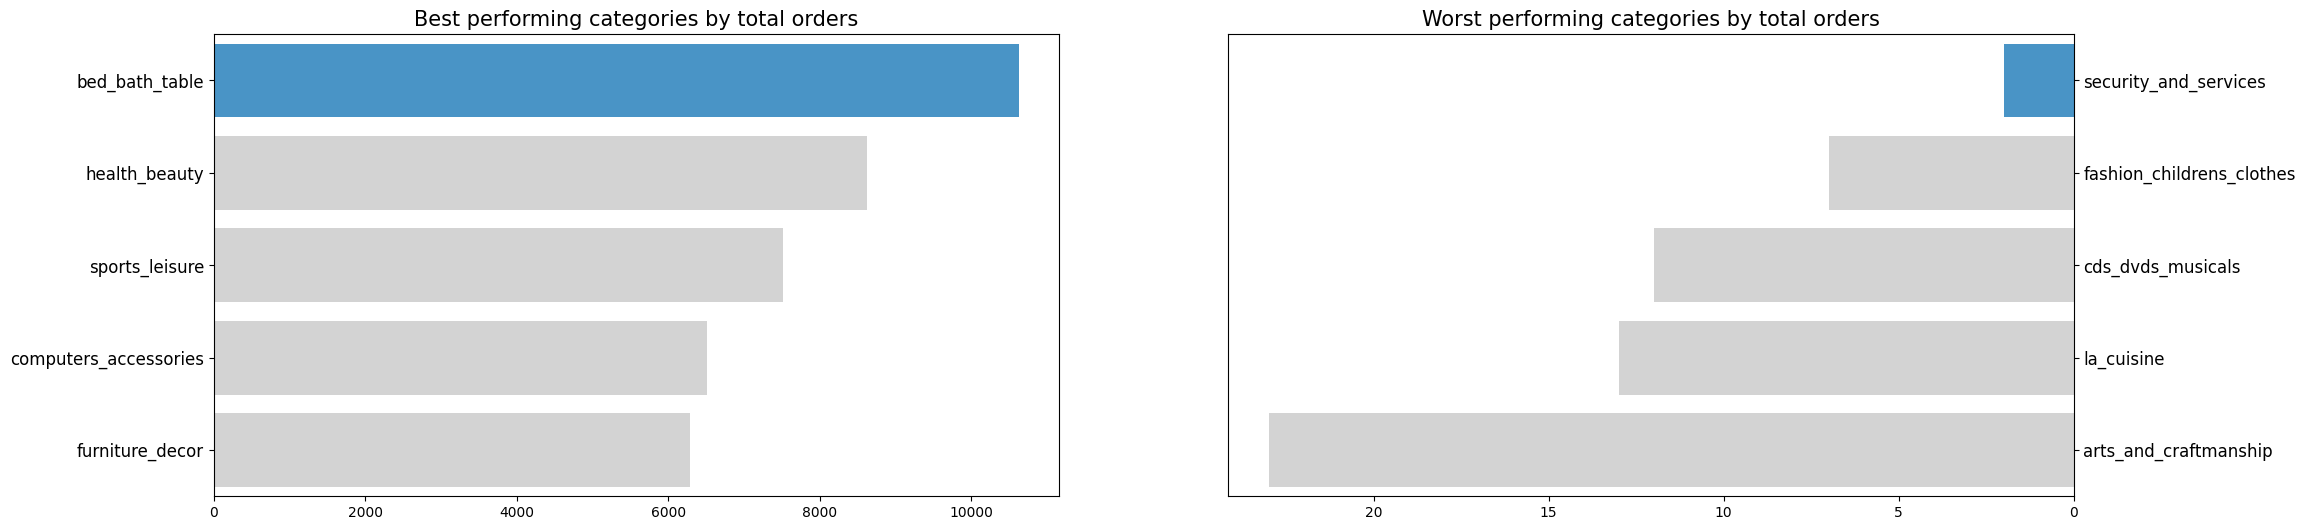

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#3498db", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_order", y="product_category_name_english", 
            data=category_orders_df.head(5), ax=ax[0], palette=colors)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best performing categories by total orders", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

sns.barplot(x="total_order", y="product_category_name_english", 
            data=category_orders_df.sort_values(by="total_order", ascending=True).head(), 
            ax=ax[1], palette=colors)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst performing categories by total orders", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

### Pertanyaan 2: Bagaimana peforma penjualan dari waktu ke waktu (perbulan)?

In [61]:
monthly_orders_df = all_df.resample(rule="M", on="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")

monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "total_order",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\2722615932.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule="M", on="order_purchase_timestamp").agg({


,order_date,total_order,revenue
0,2016-09,1,41570.76
1,2016-10,270,4402019.57
2,2016-11,0,0.00
3,2016-12,1,1624.10
4,2017-01,748,11205919.08


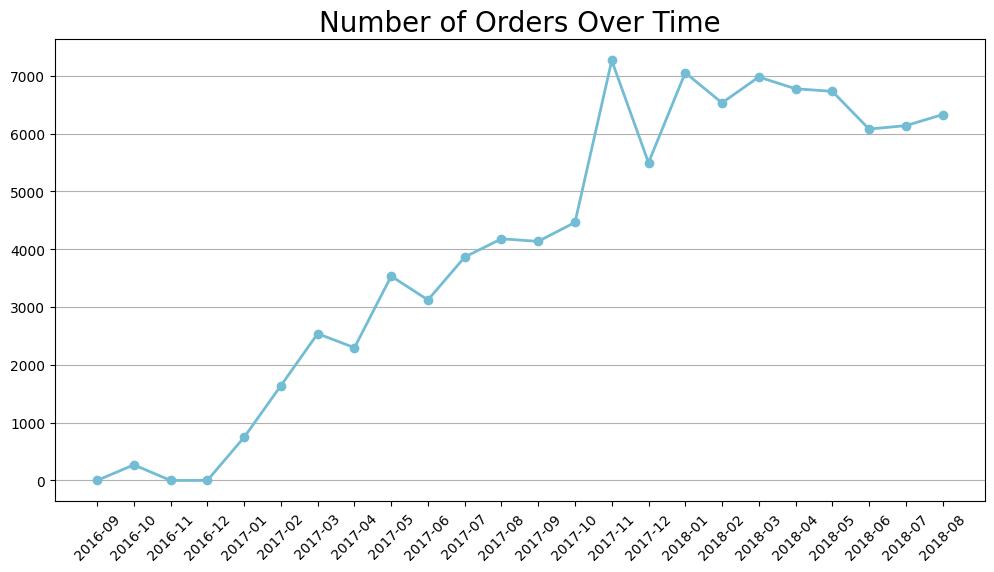

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["total_order"], linewidth=2, marker="o", color="#72bcd4")
plt.title("Number of Orders Over Time", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis="y")
plt.show()

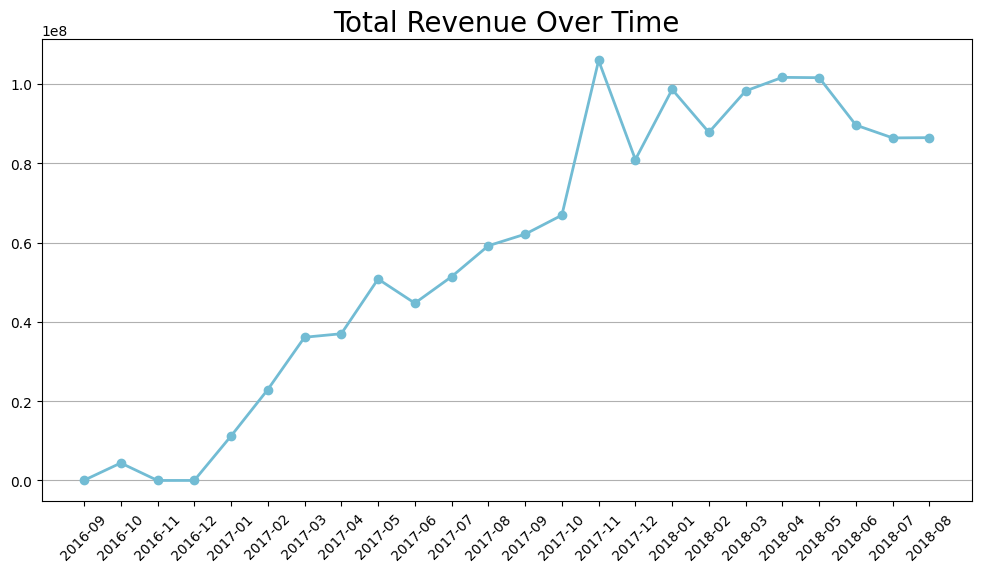

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["revenue"], linewidth=2, marker="o", color="#72bcd4")
plt.title("Total Revenue Over Time", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis="y")
plt.show()

**Insight:**
- Pertanyaan 1: Kategori produk apa yang paling banyak dibeli oleh pelanggan?
    - Kategori produk yang paling banyak dibeli oleh pelanggan adalah "bed_bath_table"
    - Kategori produk yang paling sedikit dibeli oleh pelanggan adalah "security_and_service"
- Pertanyaan 2: Bagaimana peforma penjualan dari waktu ke waktu (perbulan)?
    - Penjualan tertinggi terjadi pada bulan November 2017
    - Penjualan terendah terjadi pada bulan November 2016
    - Penjualan terus mengalami peningkatan dari bulan November 2016 hingga bulan November 2017
    - Penjualan mengalami penurunan pada bulan Desember 2017
    - Penjualan kembali mengalami peningkatan pada bulan Januari 2018

## Analisis Lanjutan (Opsional)

### RFM Analysis
Penjual mana yang memiliki frekuesi penjualan tertinggi, menghasilkan nilai penjualan tertinggi, dan baru-baru ini melakukan penjualan? 

In [64]:
rfm_df = all_df.groupby(by="seller_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["seller_id", "max_purchase_timestamp", "frequency", "monetary"]

rfm_df["max_purchase_timestamp"] = rfm_df["max_purchase_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_purchase_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop(columns="max_purchase_timestamp", inplace=True)
rfm_df.sort_values(by="recency", ascending=True).head()

,seller_id,frequency,monetary,recency
1490,7d7866a99a8656a42c7ff6352a433410,5,9969.58,0
1130,5f2684dab12e59f83bef73ae57724e45,67,797970.62,0
488,2a84855fd20af891be03bc5924d2b453,154,1984702.20,0
1219,67bf6941ba2f1fa1d02c375766bc3e53,15,483133.00,0
1190,6560211a19b47992c3666cc44a7e94c0,1814,11520879.92,0


C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\3872456325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\3872456325.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\3872456325.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


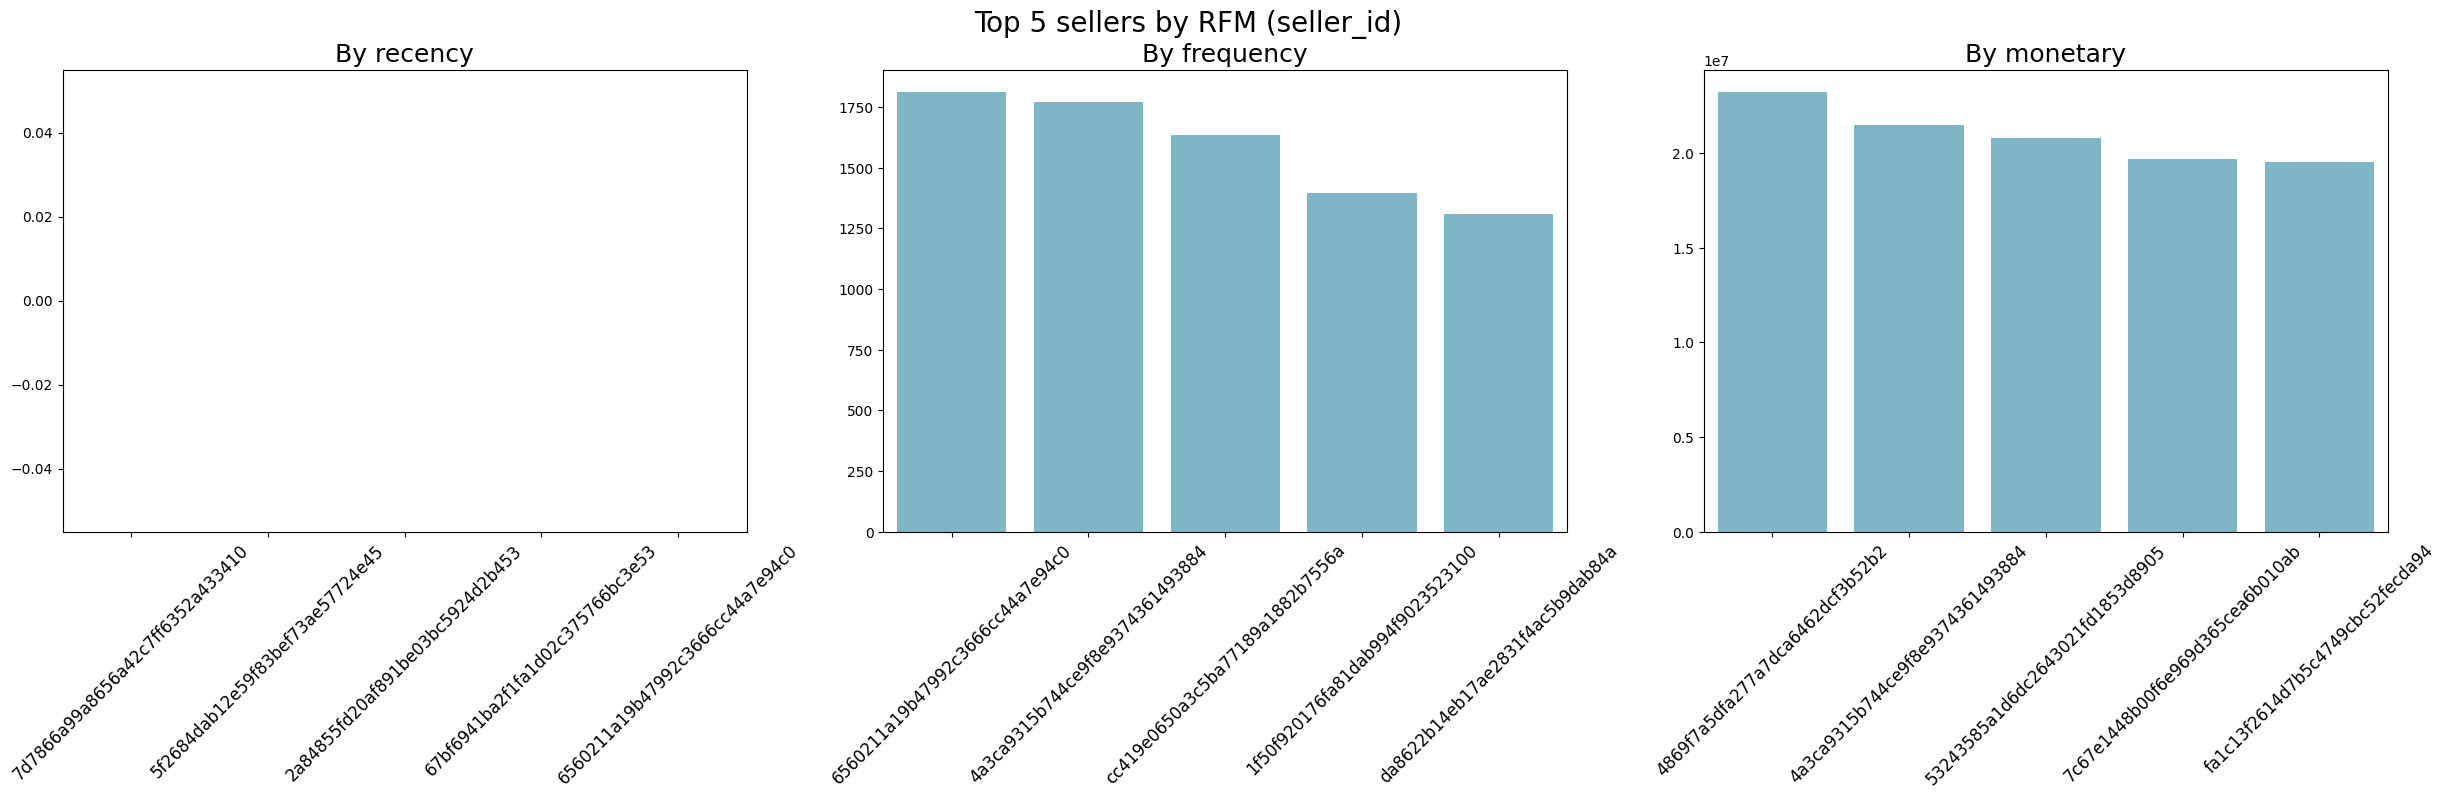

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y="recency", 
    x="seller_id", 
    data=rfm_df.sort_values(by="recency", ascending=True).head(5), 
    ax=ax[0], 
    palette=colors
)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("By recency", loc="center", fontsize=18)
ax[0].tick_params(axis="x", labelsize=12, rotation=45)

sns.barplot(
    y="frequency", 
    x="seller_id", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    ax=ax[1], 
    palette=colors
)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("By frequency", loc="center", fontsize=18)
ax[1].tick_params(axis="x", labelsize=12, rotation=45)

sns.barplot(
    y="monetary", 
    x="seller_id", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    ax=ax[2], 
    palette=colors
)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].set_title("By monetary", loc="center", fontsize=18)
ax[2].tick_params(axis="x", labelsize=12, rotation=45)

plt.suptitle("Top 5 sellers by RFM (seller_id)", fontsize=20)
plt.show()


### Geospatial Analisis
Wilayah mana yang menghasilkan volume penjualan tertinggi?

In [66]:
state_sales_geo_df = all_df.groupby(by="geolocation_state").agg({
    "order_id": "nunique",
    "geolocation_lat": "median",
    "geolocation_lng": "median"
}).reset_index().sort_values(by="order_id", ascending=False).head(10)
state_sales_geo_df.columns = ["geolocation_state", "total_order", "geolocation_lat", "geolocation_lng"]

map_center = [state_sales_geo_df["geolocation_lat"].median(), state_sales_geo_df["geolocation_lng"].median()]
sales_map = folium.Map(location=map_center, zoom_start=5, max_zoom=7)
marker_cluster = MarkerCluster().add_to(sales_map)

for rank, (idx, row) in enumerate(state_sales_geo_df.iterrows(), start=1):
    if not pd.isnull(row['geolocation_lat']) and not pd.isnull(row['geolocation_lng']):
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"Rank: {rank}\nState: {row['geolocation_state']}\nTotal Orders: {row['total_order']}",
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

sales_by_city_df = all_df.groupby(by="geolocation_city").agg({
    "order_id": "nunique",
    "geolocation_state": "first",
    "geolocation_lat": "median",
    "geolocation_lng": "median"
}).reset_index()
sales_by_city_df.columns = ["city", "total_order", "geolocation_state", "geolocation_lat", "geolocation_lng"]
name_states = state_sales_geo_df["geolocation_state"].values
sales_by_city_df = sales_by_city_df[sales_by_city_df["geolocation_state"].isin(name_states)]

min_order = sales_by_city_df['total_order'].min()
max_order = sales_by_city_df['total_order'].max()
sales_by_city_df['normalized_order'] = (sales_by_city_df['total_order'] - min_order) / (max_order - min_order)

heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['normalized_order']] for idx, row in sales_by_city_df.iterrows()]
HeatMap(heat_data,
    min_opacity=0.3,  
    radius=15,  
    blur=15,    
    max_zoom=7, 
).add_to(sales_map)

sales_map.save("sales_map.html")
sales_map

C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\829294933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\GYBRAN\AppData\Local\Temp\ipykernel_10336\829294933.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


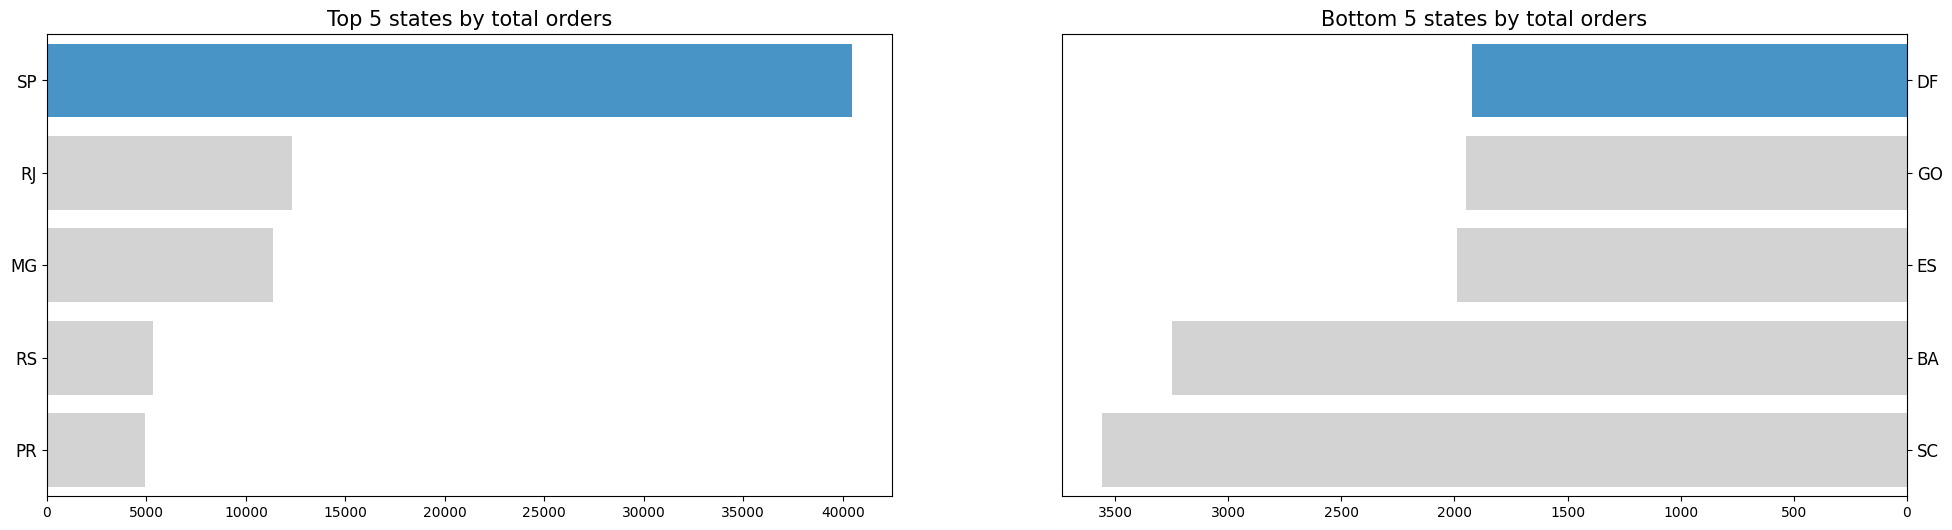

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#3498db", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="total_order", 
    y="geolocation_state", 
    data=state_sales_geo_df.sort_values(by="total_order", ascending=False).head(5), 
    ax=ax[0], 
    palette=colors
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 states by total orders", loc="center", fontsize=15)
ax[0].tick_params(axis="y", labelsize=12)

sns.barplot(
    x="total_order", 
    y="geolocation_state", 
    data=state_sales_geo_df.sort_values(by="total_order", ascending=True).head(), 
    ax=ax[1], 
    palette=colors
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bottom 5 states by total orders", loc="center", fontsize=15)
ax[1].tick_params(axis="y", labelsize=12)

plt.show()

**Insight**

- RFM Analysis
    - Penjual dengan frekuensi penjualan tertinggi adalah penjual dengan id "6560211a19b47992c3666cc44a7e94c0" dengan total 1814 orderan
    - Penjual dengan nilai penjualan tertinggi adalah penjual dengan id "6560211a19b47992c3666cc44a7e94c0" dengan total nilai penjualan 23.253.338,32 BRL (real brazil)
    - Penjual yang baru-baru ini melakukan penjualan adalah penjual dengan id
        - "7d7866a99a8656a42c7ff6352a433410"
        - "5f2684dab12e59f83bef73ae57724e45"
        - "2a84855fd20af891be03bc5924d2b453"
        - "67bf6941ba2f1fa1d02c375766bc3e53"
        - "6560211a19b47992c3666cc44a7e94c0"

- Geospatial Analisis
    - Wilayah yang menghasilkan volume penjualan tertinggi adalah "SP" dengan total volume penjualan 40475


In [68]:
all_df.to_csv("dashboard/main_data.csv", index=False)

## Conclusion

`- Conclution pertanyaan 1` \
"bed_bath_table" adalah kategori produk yang paling banyak dibeli oleh pelanggan, sedangkan "security_and_service" adalah kategori produk yang paling sedikit dibeli oleh pelanggan.
\
\
`- Conclution pertanyaan 2`\
Penjualan tertinggi terjadi pada bulan November 2017, sedangkan penjualan terendah terjadi pada bulan November 2016. Penjualan terus mengalami peningkatan dari bulan November 2016 hingga bulan November 2017, kemudian mengalami penurunan pada bulan Desember 2017, dan kembali mengalami peningkatan pada bulan Januari 2018. 
\
\
`- Conclution analisis lanjutan`
- Penjual dengan frekuensi penjualan tertinggi adalah penjual dengan id "6560211a19b47992c3666cc44a7e94c0" dengan total 1814 orderan, sedangkan penjual dengan nilai penjualan tertinggi adalah penjual dengan id "6560211a19b47992c3666cc44a7e94c0" dengan total nilai penjualan 23.253.338,32 BRL (real brazil). Penjual yang baru-baru ini melakukan penjualan adalah penjual dengan id "7d7866a99a8656a42c7ff6352a433410", "5f2684dab12e59f83bef73ae57724e45", "2a84855fd20af891be03bc5924d2b453", "67bf6941ba2f1fa1d02c375766bc3e53", dan "6560211a19b47992c3666cc44a7e94c0".
- Wilayah yang menghasilkan volume penjualan tertinggi adalah "SP" dengan total volume penjualan 40475 order
